In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
from datetime import datetime as dt 

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob

from scipy.stats.stats import pearsonr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Display all data

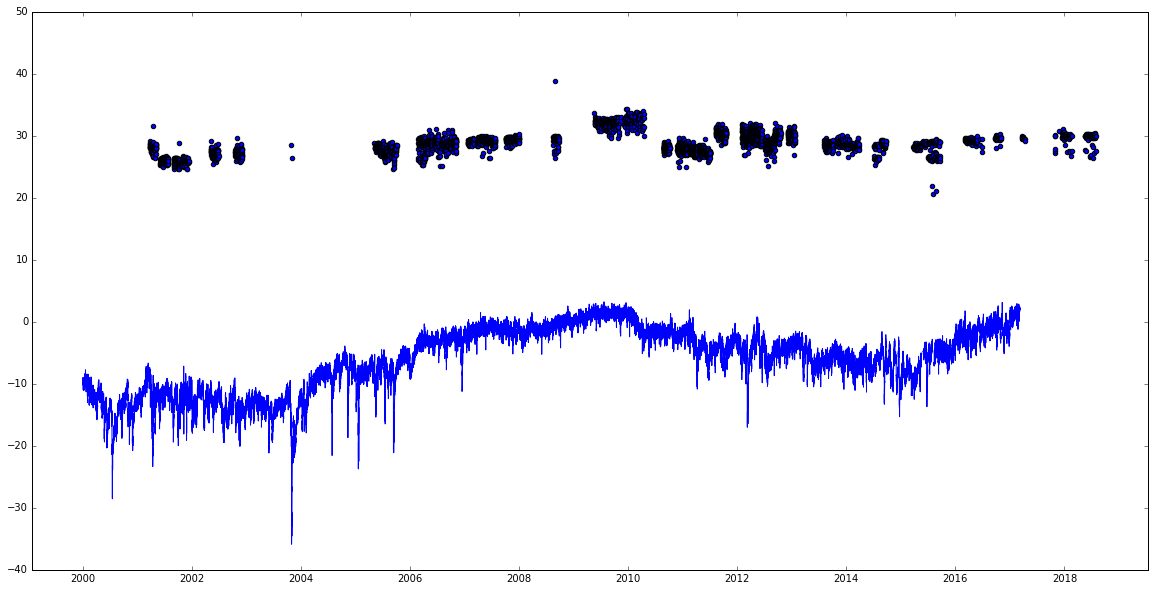

In [4]:
plt.figure(figsize=(20, 10))

df3 = pd.read_csv('./radiation_avg.csv', sep=',', header=0)#, parse_dates='time' 
df3['date'] = pd.to_datetime(df3['date'])
df3 = df3.set_index('date')
df3 = df3.sort_index()

df4 = pd.read_csv('./LSradiation.csv', sep=',', header=0)#, parse_dates='time')
df4['time'] = pd.to_datetime(df4['time'])
df4 = df4.set_index('time')
df4 = df4.sort_index()

plt.plot(df4.index,df4['FD']-100)
plt.scatter(df3.index,df3['count']*10)


# Display CR10 style data

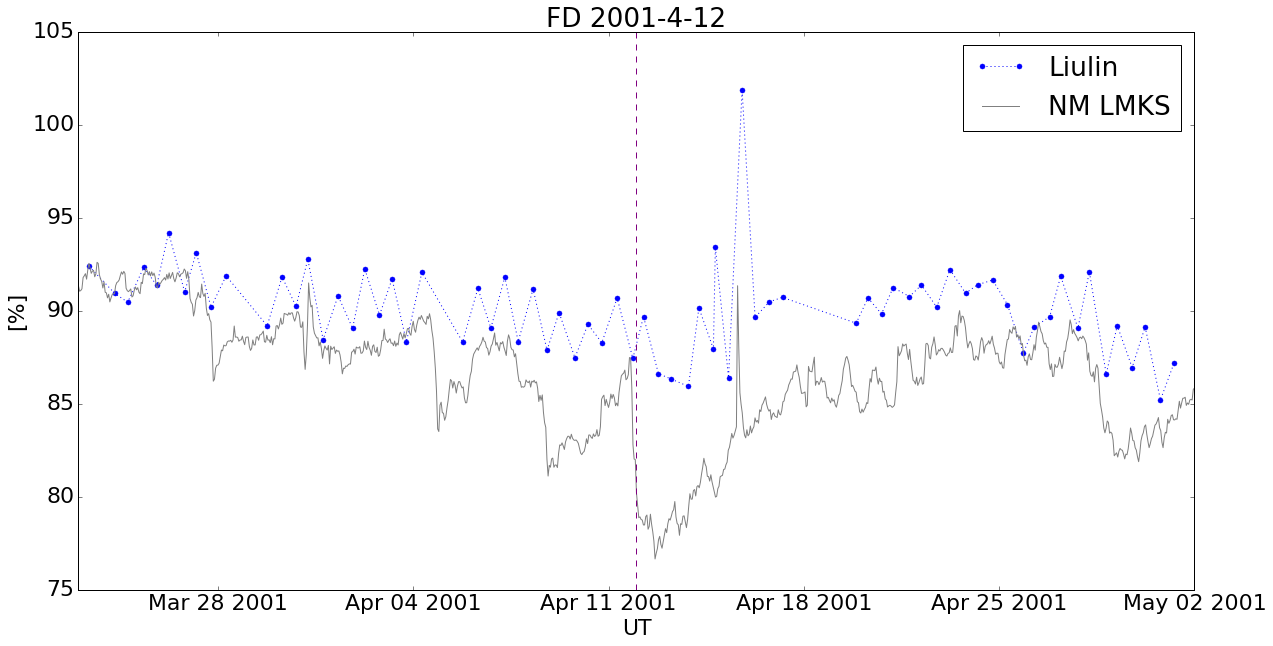

In [78]:
FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
#FD = '2015-8-4'

days_view = 20

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0, parse_dates='time' )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
        
datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]
plt.plot(df2[from_time: to_time].index,df2[from_time: to_time]['c'],lw='1', markersize=10,marker='.',linestyle=':',label='Liulin')
#plt.ylim(1.5,3.2)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))

#plt.twinx()

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],color='grey',label='NM LMKS')
plt.title('FD ' + FD) 

plt.axvline(x=pd.to_datetime(FD), color='purple', ls='--') # plot dashed vertical line at the FD time

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend()

# Plot map

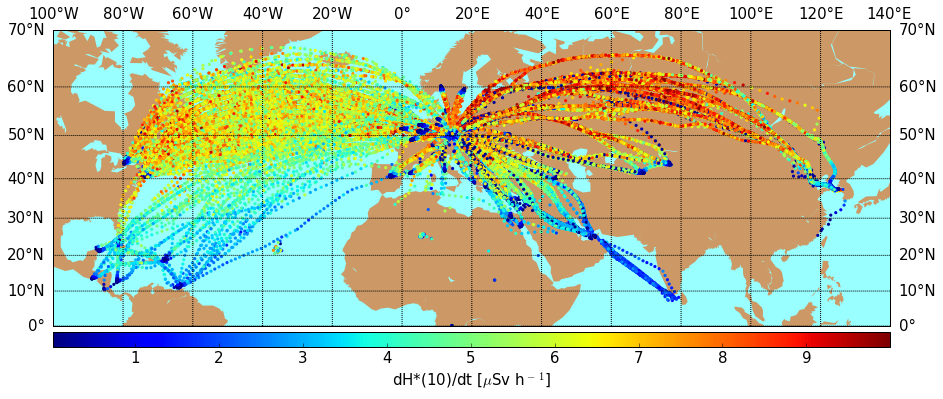

In [129]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

def createColourbar(lwr, upr):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = matplotlib.colorbar.make_axes(mp.gca())
    norm = matplotlib.colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = matplotlib.colorbar.ColorbarBase(cax, cmap=mp.spectral(), norm=norm)
    return c

plt.figure(figsize=(15,15))
matplotlib.rcParams.update({'font.size': 15})

# World map
m = Basemap(llcrnrlon=-100,llcrnrlat=0,urcrnrlon=140,urcrnrlat=70,projection='mill')

filename = './data/AllRun.txt'

df = pd.read_csv(filename,delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df = df.resample('10 min', how='mean', base=0)
df.dropna(inplace=True)
df = df.loc[df['H']<10].loc[df['H']>0]
#df = df.loc['2017':'2018']
#df = df.loc[df['lat']<5].loc[df['lat']>0]
#df = df.loc[df['lon']<20].loc[df['lon']>0]
#df = df.loc[df['alt']>35000].loc[df['alt']<36000]

x, y = m(df['lon'].tolist(),df['lat'].tolist())
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
m.drawparallels(np.arange(-90.,99.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0,0,1,0])
im1 = m.scatter(x,y,c=df['H'].tolist(),s=10,marker='o', linewidth='0', cmap='jet')

cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label(r'dH*(10)/dt [$\mu$Sv h$^-$$^1$]')
plt.show()

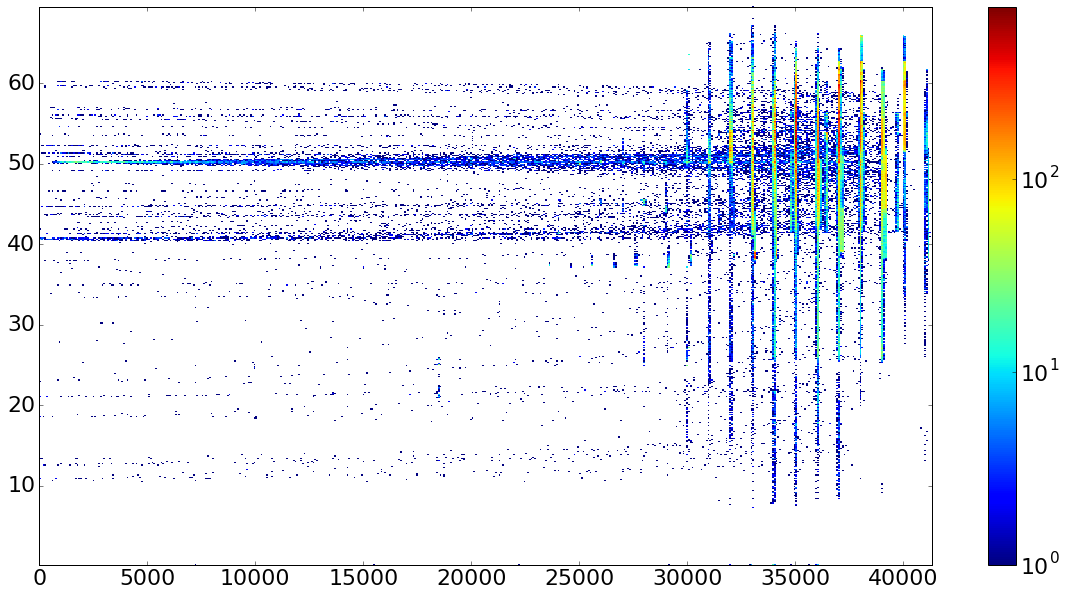

In [126]:
plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df = pd.read_csv('./output/AllRun.txt',delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])

plt.hist2d(df['alt'], df['lat'], bins=(500,500), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.colorbar()

In [128]:
df

,lat,lon,alt,H
date,,,,
2008-08-26 11:30:00,0.2,14.3,15516,0.98
2008-08-26 11:40:00,0.2,14.3,29120,5.00
2008-08-26 11:50:00,0.2,14.3,31980,4.75
2008-08-26 12:00:00,0.2,14.3,31982,3.73
2008-08-26 12:10:00,0.2,14.3,32836,5.15
2008-08-26 12:20:00,0.2,14.3,32969,4.37
2008-08-26 12:30:00,0.2,14.3,32983,5.62
2008-08-26 12:40:00,0.2,14.3,32983,4.48
2008-08-26 12:50:00,0.2,14.3,32978,4.90
